In [76]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
x1 = np.linspace(0, 3, 4)
y1 = np.linspace(0, 2, 3)

#print(np.meshgrid(x,y))
x1, y1 = np.meshgrid(x1, y1)

print((x1,y1))

#xData = np.vstack((x.ravel(),y.ravel()))
#print(xData)



(array([[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.]]), array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.]]))


In [59]:
def TwoD_Gaussian((x,y), amp, x0, y0, sigma_x, sigma_y):
    g = np.exp(-((x-x0)**2/sigma_x**2+(y-y0)**2/sigma_y**2))
    #return g.ravel()
    return g
    
noise2 = np.random.normal(size=(3,2))

data1 = TwoD_Gaussian((x1,y1),50, 2, 1, 0.5, 0.4)
print(data1)




[[  2.17243994e-10   3.53575009e-05   1.93045414e-03   3.53575009e-05]
 [  1.12535175e-07   1.83156389e-02   1.00000000e+00   1.83156389e-02]
 [  2.17243994e-10   3.53575009e-05   1.93045414e-03   3.53575009e-05]]


In [ ]:
y, x = numpy.mgrid[:3,:4]
print(x)
print(y)
z = 2.*x**2-0.5*x*y
print(z)

In [29]:
z = np.zeros((3,2))
noise = np.random.normal(size=z.shape)
print(noise)

[[-0.35310697 -2.17353687]
 [-0.21768962  0.33014343]
 [ 0.57797313  0.09499475]]


In [35]:
noise.reshape(6)

array([-0.35310697, -2.17353687, -0.21768962,  0.33014343,  0.57797313,
        0.09499475])

In [37]:
noise.ravel()

array([-0.35310697, -2.17353687, -0.21768962,  0.33014343,  0.57797313,
        0.09499475])

In [49]:
#.ravel()
#np.vstack?

AttributeError: 'int' object has no attribute 'ravel'

In [79]:
scipy.optimize.curve_fit?

In [67]:
def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

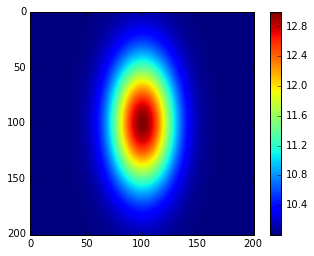

In [78]:
# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

In [83]:
# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

data_noisy = data + 0.2*np.random.normal(size=data.shape)

popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)
print(data_noisy.shape)

(40401,)


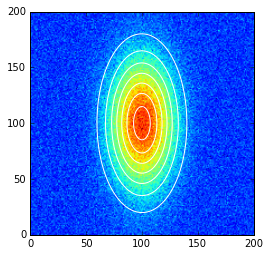

In [77]:
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors='w')